In [1]:
import pandas as pd
from tqdm.auto import tqdm

# Load the dataset
file_path = 'credit_risk_dataset.csv'
data = pd.read_csv(file_path, encoding='ascii')

# Show the head of the dataframe
data_head = data.head()

# Display the head of the dataframe
print(data_head)

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


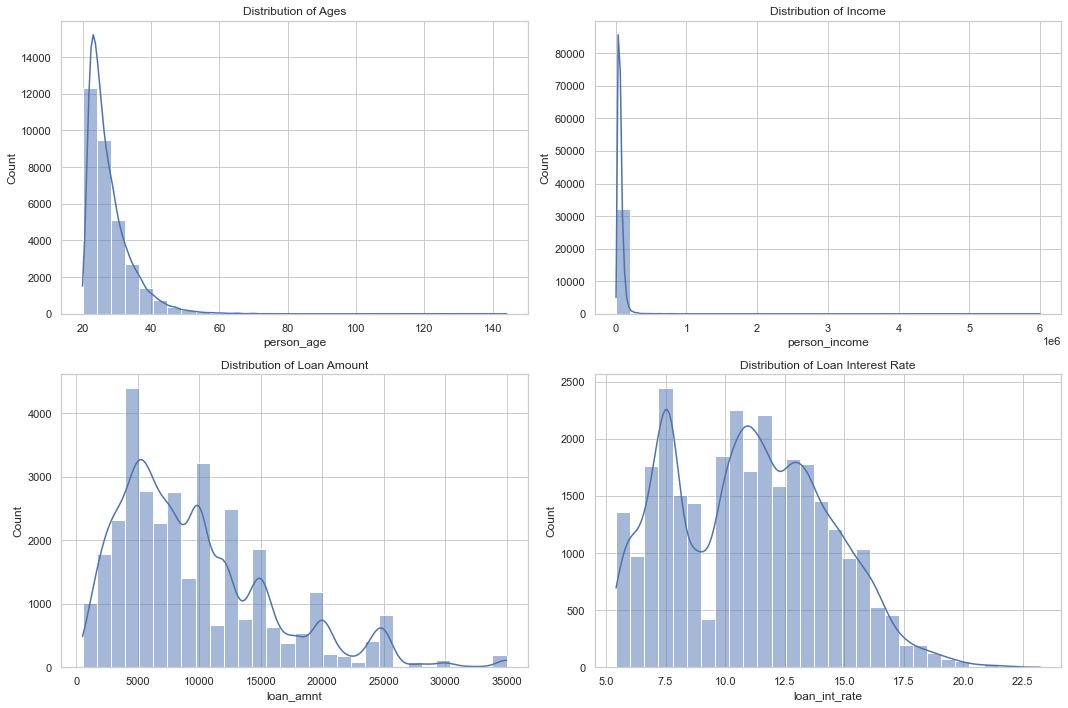

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Plot distributions of a few numerical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot distribution of person_age
sns.histplot(data['person_age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Ages')

# Plot distribution of person_income
sns.histplot(data['person_income'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Income')

# Plot distribution of loan_amnt
sns.histplot(data['loan_amnt'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Loan Amount')

# Plot distribution of loan_int_rate
sns.histplot(data['loan_int_rate'].dropna(), bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Loan Interest Rate')

plt.tight_layout()
plt.show()

In [4]:
# Data Preprocessing

# Check for missing values
missing_values = data.isnull().sum()

# Check for categorical variables
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

# Check for numerical variables
numerical_variables = data.select_dtypes(include=['number']).columns.tolist()

# Output the findings
print('Missing Values:\n', missing_values)
print('\nCategorical Variables:', categorical_variables)
print('\nNumerical Variables:', numerical_variables)

Missing Values:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Categorical Variables: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

Numerical Variables: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on categorical variables
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(data[categorical_variables]))

# One-hot encoding removes index; put it back
encoded_categorical_data.index = data.index

# Retrieve new column names from the encoder
encoded_categorical_data.columns = encoder.get_feature_names_out(categorical_variables)

# Drop original categorical columns and concatenate the encoded ones
data_encoded = pd.concat([data.drop(categorical_variables, axis=1), encoded_categorical_data], axis=1)

# Display the head of the new dataframe
print(data_encoded.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                             0.0                          0.0 

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on categorical variables
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(data[categorical_variables]))

# One-hot encoding removes index; put it back
encoded_categorical_data.index = data.index

# Retrieve new column names from the encoder
# Use get_feature_names for older versions of scikit-learn
encoded_categorical_data.columns = encoder.get_feature_names(categorical_variables)

# Drop original categorical columns and concatenate the encoded ones
data_encoded = pd.concat([data.drop(categorical_variables, axis=1), encoded_categorical_data], axis=1)

# Display the head of the new dataframe
print(data_encoded.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                             0.0                          0.0 

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the target variable and features
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a series with feature importances
importances = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Display the sorted importances
print(sorted_importances.head(10))

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate a classification report
class_report = classification_report(y_test, predictions)

# Output the accuracy and classification report
print('Accuracy of the model:', accuracy)
print('\nClassification Report:\n', class_report)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
# Check for any NaN or infinite values in the dataset
print('Checking for NaN values in the dataset:')
print(data_encoded.isnull().sum())
print('\nChecking for infinite values in the dataset:')
print(np.isinf(data_encoded).sum())

# If NaN or infinite values are found, we will need to decide how to handle them
# Options include imputation, removal, or replacing with a specific value

Checking for NaN values in the dataset:
person_age                           0
person_income                        0
person_emp_length                  895
loan_amnt                            0
loan_int_rate                     3116
loan_status                          0
loan_percent_income                  0
cb_person_cred_hist_length           0
person_home_ownership_MORTGAGE       0
person_home_ownership_OTHER          0
person_home_ownership_OWN            0
person_home_ownership_RENT           0
loan_intent_DEBTCONSOLIDATION        0
loan_intent_EDUCATION                0
loan_intent_HOMEIMPROVEMENT          0
loan_intent_MEDICAL                  0
loan_intent_PERSONAL                 0
loan_intent_VENTURE                  0
loan_grade_A                         0
loan_grade_B                         0
loan_grade_C                         0
loan_grade_D                         0
loan_grade_E                         0
loan_grade_F                         0
loan_grade_G            

In [9]:
from sklearn.impute import SimpleImputer

# Create imputers for the columns with missing values
emp_length_imputer = SimpleImputer(strategy='median')
int_rate_imputer = SimpleImputer(strategy='mean')

# Impute missing values in 'person_emp_length' column
data_encoded['person_emp_length'] = emp_length_imputer.fit_transform(data_encoded[['person_emp_length']])

# Impute missing values in 'loan_int_rate' column
data_encoded['loan_int_rate'] = int_rate_imputer.fit_transform(data_encoded[['loan_int_rate']])

# Check again for any NaN or infinite values in the dataset
print('Rechecking for NaN values in the dataset after imputation:')
print(data_encoded.isnull().sum())
print('\nRechecking for infinite values in the dataset after imputation:')
print(np.isinf(data_encoded).sum())

Rechecking for NaN values in the dataset after imputation:
person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_pe

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define the target variable and features
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a series with feature importances
importances = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Display the sorted importances
print(sorted_importances.head(10))

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate a classification report
class_report = classification_report(y_test, predictions)

# Output the accuracy and classification report
print('Accuracy of the model:', accuracy)
print('\nClassification Report:\n', class_report)

loan_percent_income               0.220168
person_income                     0.145059
loan_int_rate                     0.106469
loan_amnt                         0.075531
person_emp_length                 0.059907
person_home_ownership_RENT        0.057126
loan_grade_D                      0.054694
person_age                        0.045134
cb_person_cred_hist_length        0.034340
person_home_ownership_MORTGAGE    0.028674
dtype: float64
Accuracy of the model: 0.9323308270676691

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.97      0.72      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [11]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search for the best parameters for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print('Best parameters found by GridSearchCV:')
print(grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
predictions_best = best_rf.predict(X_test)

# Calculate the accuracy for the best estimator
accuracy_best = accuracy_score(y_test, predictions_best)

# Generate a classification report for the best estimator
class_report_best = classification_report(y_test, predictions_best)

# Output the accuracy and classification report for the best estimator
print('Accuracy of the best estimator:', accuracy_best)
print('\nClassification Report for the best estimator:\n', class_report_best)

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

Best parameters found by GridSearchCV:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Accuracy of the best estimator: 0.9255792542580942

Classification Report for the best estimator:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.97      0.68      0.80      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.84      0.88      6517
weighted avg       0.93      0.93      0.92      6517



In [12]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get importances and std
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std

# Create a DataFrame for the permutation importances
perm_importance_df = pd.DataFrame({'feature': X.columns, 'importance_mean': importances_mean, 'importance_std': importances_std})

# Sort the DataFrame by importance_mean in descending order
perm_importance_df = perm_importance_df.sort_values(by='importance_mean', ascending=False)

# Save the permutation importances to a CSV file
perm_importance_df.to_csv('permutation_importances.csv', index=False)

# Display the top 10 features based on permutation importance
print(perm_importance_df.head(10))

# Provide the link to download the permutation importances file
print('Permutation importances can be downloaded from the following link:')
print('https://julius.ai/files?filename=permutation_importances.csv')

                          feature  importance_mean  importance_std
5             loan_percent_income         0.092451        0.002551
10     person_home_ownership_RENT         0.046555        0.002150
20                   loan_grade_D         0.037272        0.001103
1                   person_income         0.027190        0.001150
11  loan_intent_DEBTCONSOLIDATION         0.015590        0.000659
14            loan_intent_MEDICAL         0.014685        0.001228
2               person_emp_length         0.013503        0.001009
4                   loan_int_rate         0.011554        0.001206
9       person_home_ownership_OWN         0.004603        0.000495
21                   loan_grade_E         0.002547        0.000123
Permutation importances can be downloaded from the following link:
https://julius.ai/files?filename=permutation_importances.csv


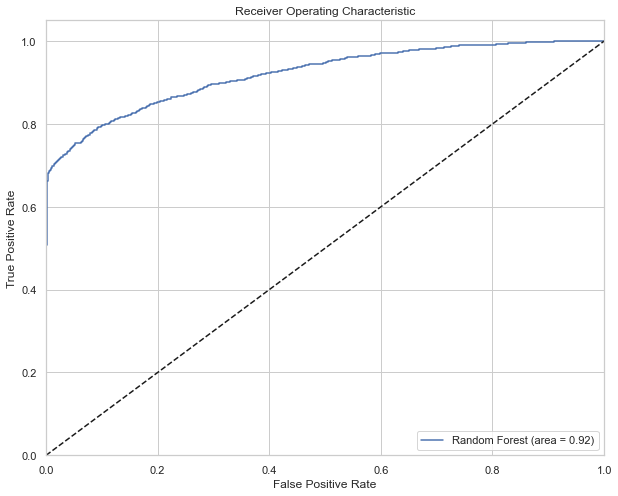

ROC AUC score: 0.9202727778808686


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Get ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Output the ROC AUC score
print('ROC AUC score:', roc_auc)

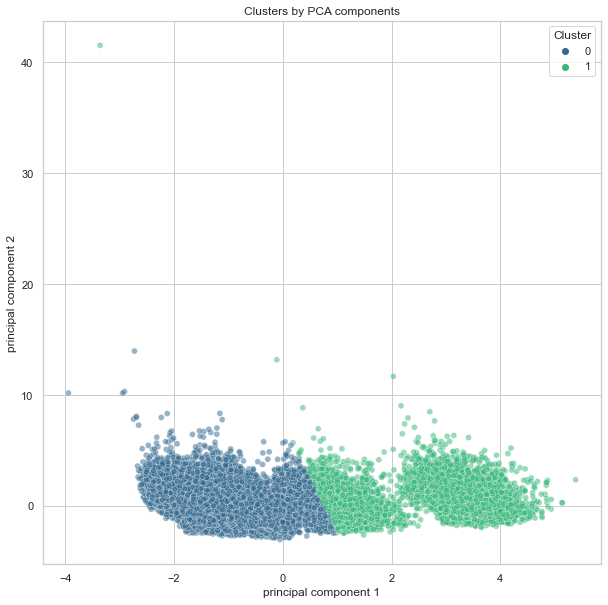

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Predict the cluster labels
labels = kmeans.predict(X_pca)

# Create a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10,10))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.5)
plt.title('Clusters by PCA components')
plt.show()

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 32581 samples in 0.005s...
[t-SNE] Computed neighbors for 32581 samples in 9.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32581
[t-SNE] Computed conditional probabilities for sample 2000 / 32581
[t-SNE] Computed conditional probabilities for sample 3000 / 32581
[t-SNE] Computed conditional probabilities for sample 4000 / 32581
[t-SNE] Computed conditional probabilities for sample 5000 / 32581
[t-SNE] Computed conditional probabilities for sample 6000 / 32581
[t-SNE] Computed conditional probabilities for sample 7000 / 32581
[t-SNE] Computed conditional probabilities for sample 8000 / 32581
[t-SNE] Computed conditional probabilities for sample 9000 / 32581
[t-SNE] Computed conditional probabilities for sample 10000 / 32581
[t-SNE] Computed conditional probabilities for sample 11000 / 32581
[t-SNE] Computed conditional probabilities for sample 12000 / 32581
[t-SNE] Computed conditional probabilities for sa

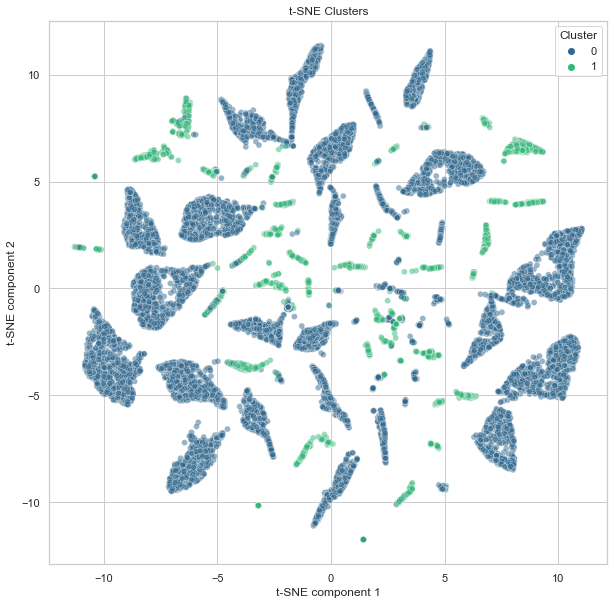

In [15]:
from sklearn.manifold import TSNE

# Perform t-Distributed Stochastic Neighbor Embedding (t-SNE) to further visualize the dataset
# This is a more advanced technique than PCA for visualization purposes

# Initialize t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

# Apply t-SNE to the scaled features
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE component 1', 't-SNE component 2'])
tsne_df['Cluster'] = labels  # Use the same cluster labels from KMeans

# Plot the t-SNE results with the cluster labels
plt.figure(figsize=(10,10))
sns.scatterplot(x='t-SNE component 1', y='t-SNE component 2', hue='Cluster', data=tsne_df, palette='viridis', alpha=0.5)
plt.title('t-SNE Clusters')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14484\570384440.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Target')


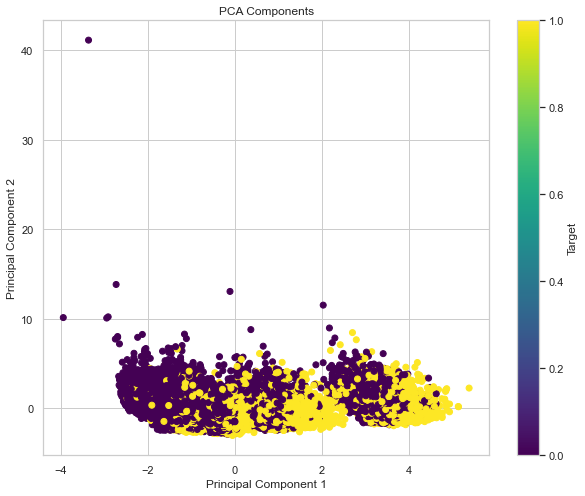

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the scaled features
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components')
plt.colorbar(label='Target')
plt.show()

C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ASUS\.anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 32581 samples in 0.102s...
[t-SNE] Computed neighbors for 32581 samples in 5.766s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32581
[t-SNE] Computed conditional probabilities for sample 2000 / 32581
[t-SNE] Computed conditional probabilities for sample 3000 / 32581
[t-SNE] Computed conditional probabilities for sample 4000 / 32581
[t-SNE] Computed conditional probabilities for sample 5000 / 32581
[t-SNE] Computed conditional probabilities for sample 6000 / 32581
[t-SNE] Computed conditional probabilities for sample 7000 / 32581
[t-SNE] Computed conditional probabilities for sample 8000 / 32581
[t-SNE] Computed conditional probabilities for sample 9000 / 32581
[t-SNE] Computed conditional probabilities for sample 10000 / 32581
[t-SNE] Computed conditional probabilities for sample 11000 / 32581
[t-SNE] Computed conditional probabilities for sample 12000 / 32581
[t-SNE] Computed conditional probabilities for sa

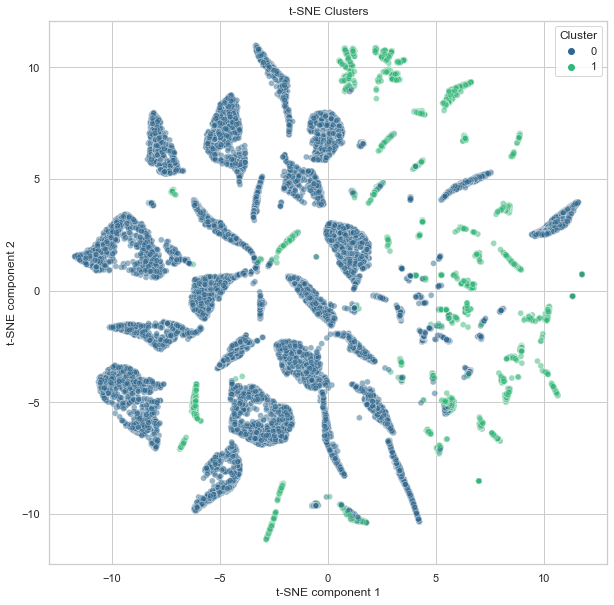

In [17]:
from sklearn.manifold import TSNE

# Perform t-Distributed Stochastic Neighbor Embedding (t-SNE) to further visualize the dataset
# This is a more advanced technique than PCA for visualization purposes

# Initialize t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

# Apply t-SNE to the scaled features
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE component 1', 't-SNE component 2'])
tsne_df['Cluster'] = labels  # Use the same cluster labels from KMeans

# Plot the t-SNE results with the cluster labels
plt.figure(figsize=(10,10))
sns.scatterplot(x='t-SNE component 1', y='t-SNE component 2', hue='Cluster', data=tsne_df, palette='viridis', alpha=0.5)
plt.title('t-SNE Clusters')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14484\570384440.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Target')


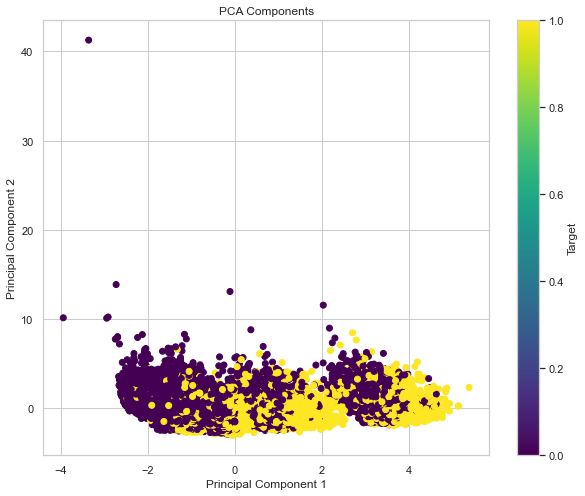

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the scaled features
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components')
plt.colorbar(label='Target')
plt.show()